In [1]:
!nvidia-smi # Connected the runtime to 'GPU'

Sun Mar 17 10:01:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [27]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/Drive-Drowsiness-Detection-2/train/images/100_jpg.rf.1dbf7ec4662923b27f46efcd4dcdb061.jpg' # it will download the image and the modelthen it will do the predictionD

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/Drive-Drowsiness-Detection-2/train/images/100_jpg.rf.1dbf7ec4662923b27f46efcd4dcdb061.jpg: 640x640 2 persons, 10.9ms
Speed: 6.3ms preprocess, 10.9ms inference, 547.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [1]:
!pip install roboflow

In [44]:
from ultralytics import YOLO
from IPython.display import display , Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.3/201.2 GB disk)


In [45]:
from roboflow import Roboflow
rf = Roboflow(api_key="cdHbT9N7rvgK2WGChCph")
project = rf.workspace("detection-4nooy").project("drive-drowsiness-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [46]:
import yaml

# /content/Drive-Drowsiness-Detection-2


# Read the contents of the data.yaml file
with open('/content/Drive-Drowsiness-Detection-2/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update the paths in the test, train, and val sections
data['test'] = '/content/../test/images'
data['train'] = '/content/Drive-Drowsiness-Detection-2/train/images'
data['val'] = '/content/Drive-Drowsiness-Detection-2/valid/images'

# Write the modified data back to the data.yaml file
with open('/content/Drive-Drowsiness-Detection-2/data.yaml', 'w') as file:
    yaml.dump(data, file)

In [47]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Drive-Drowsiness-Detection-2/data.yaml epochs=40 imgsz=640 plots=True batch=16

100% 49.7M/49.7M [00:00<00:00, 289MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Drive-Drowsiness-Detection-2/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [48]:
from IPython.display import display , Image
from IPython import display
display.clear_output()

# New Section

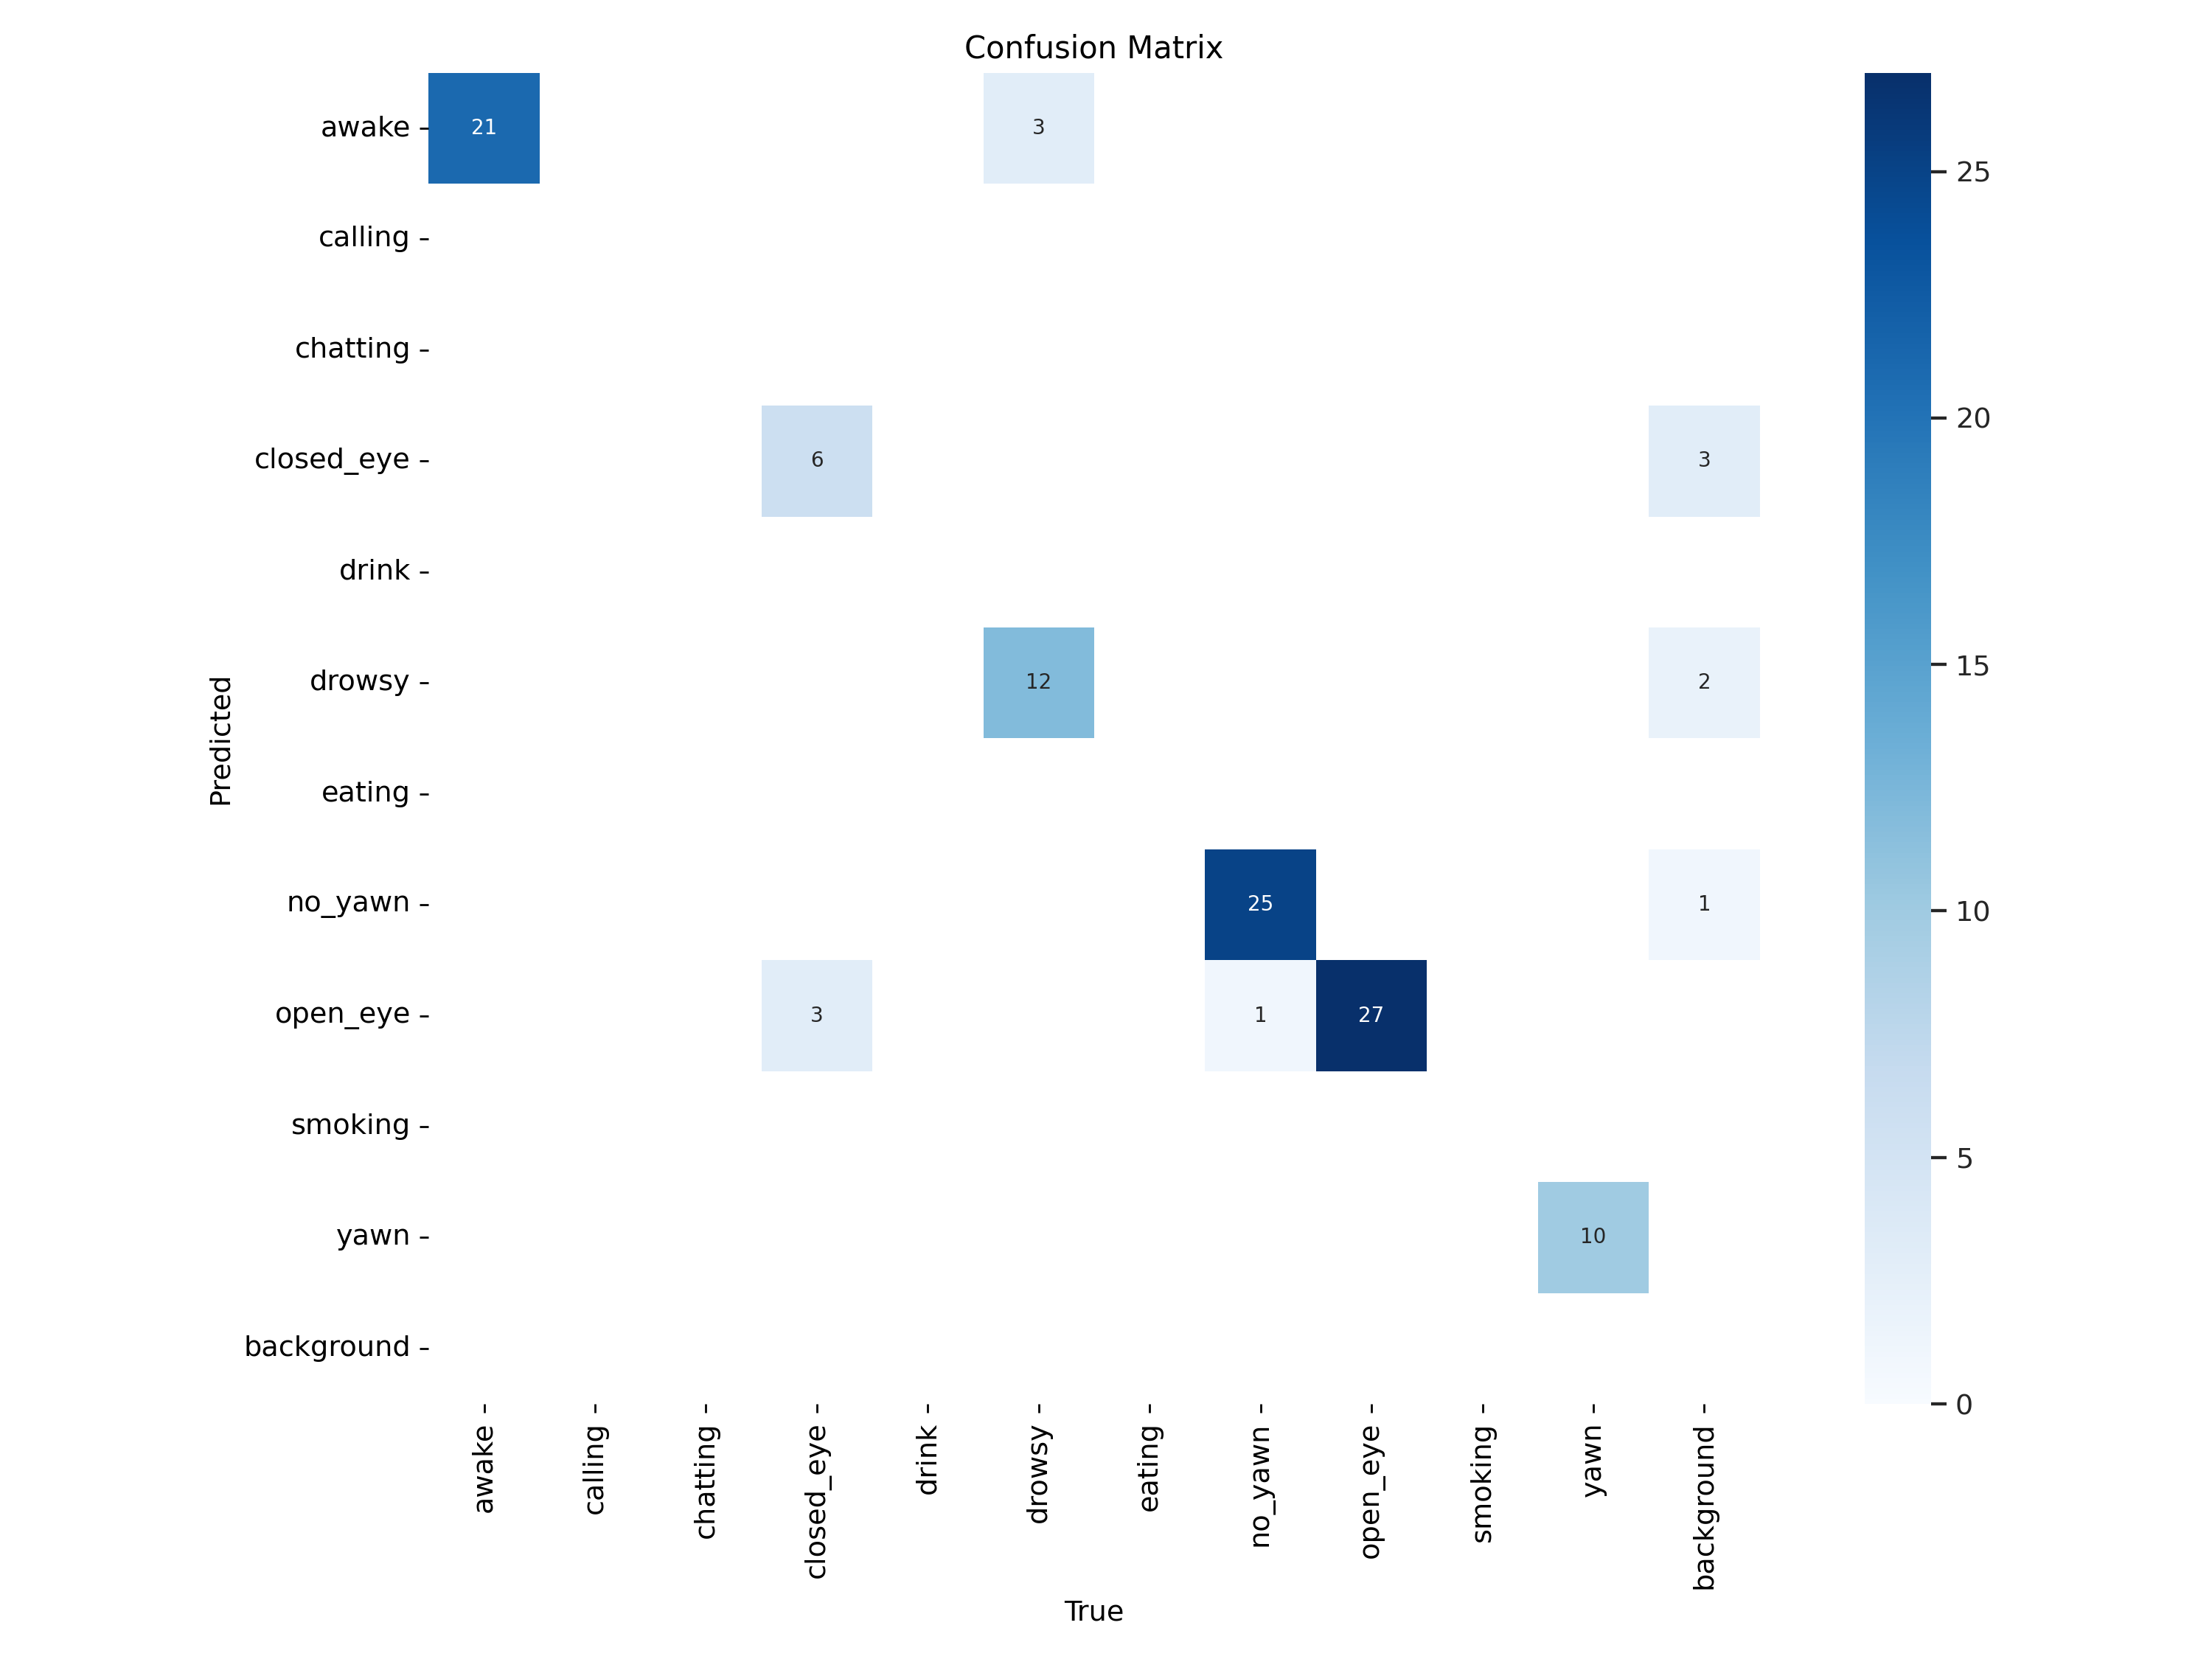

In [49]:
Image(filename = f'/content/runs/detect/train3/confusion_matrix.png' , height = 600)

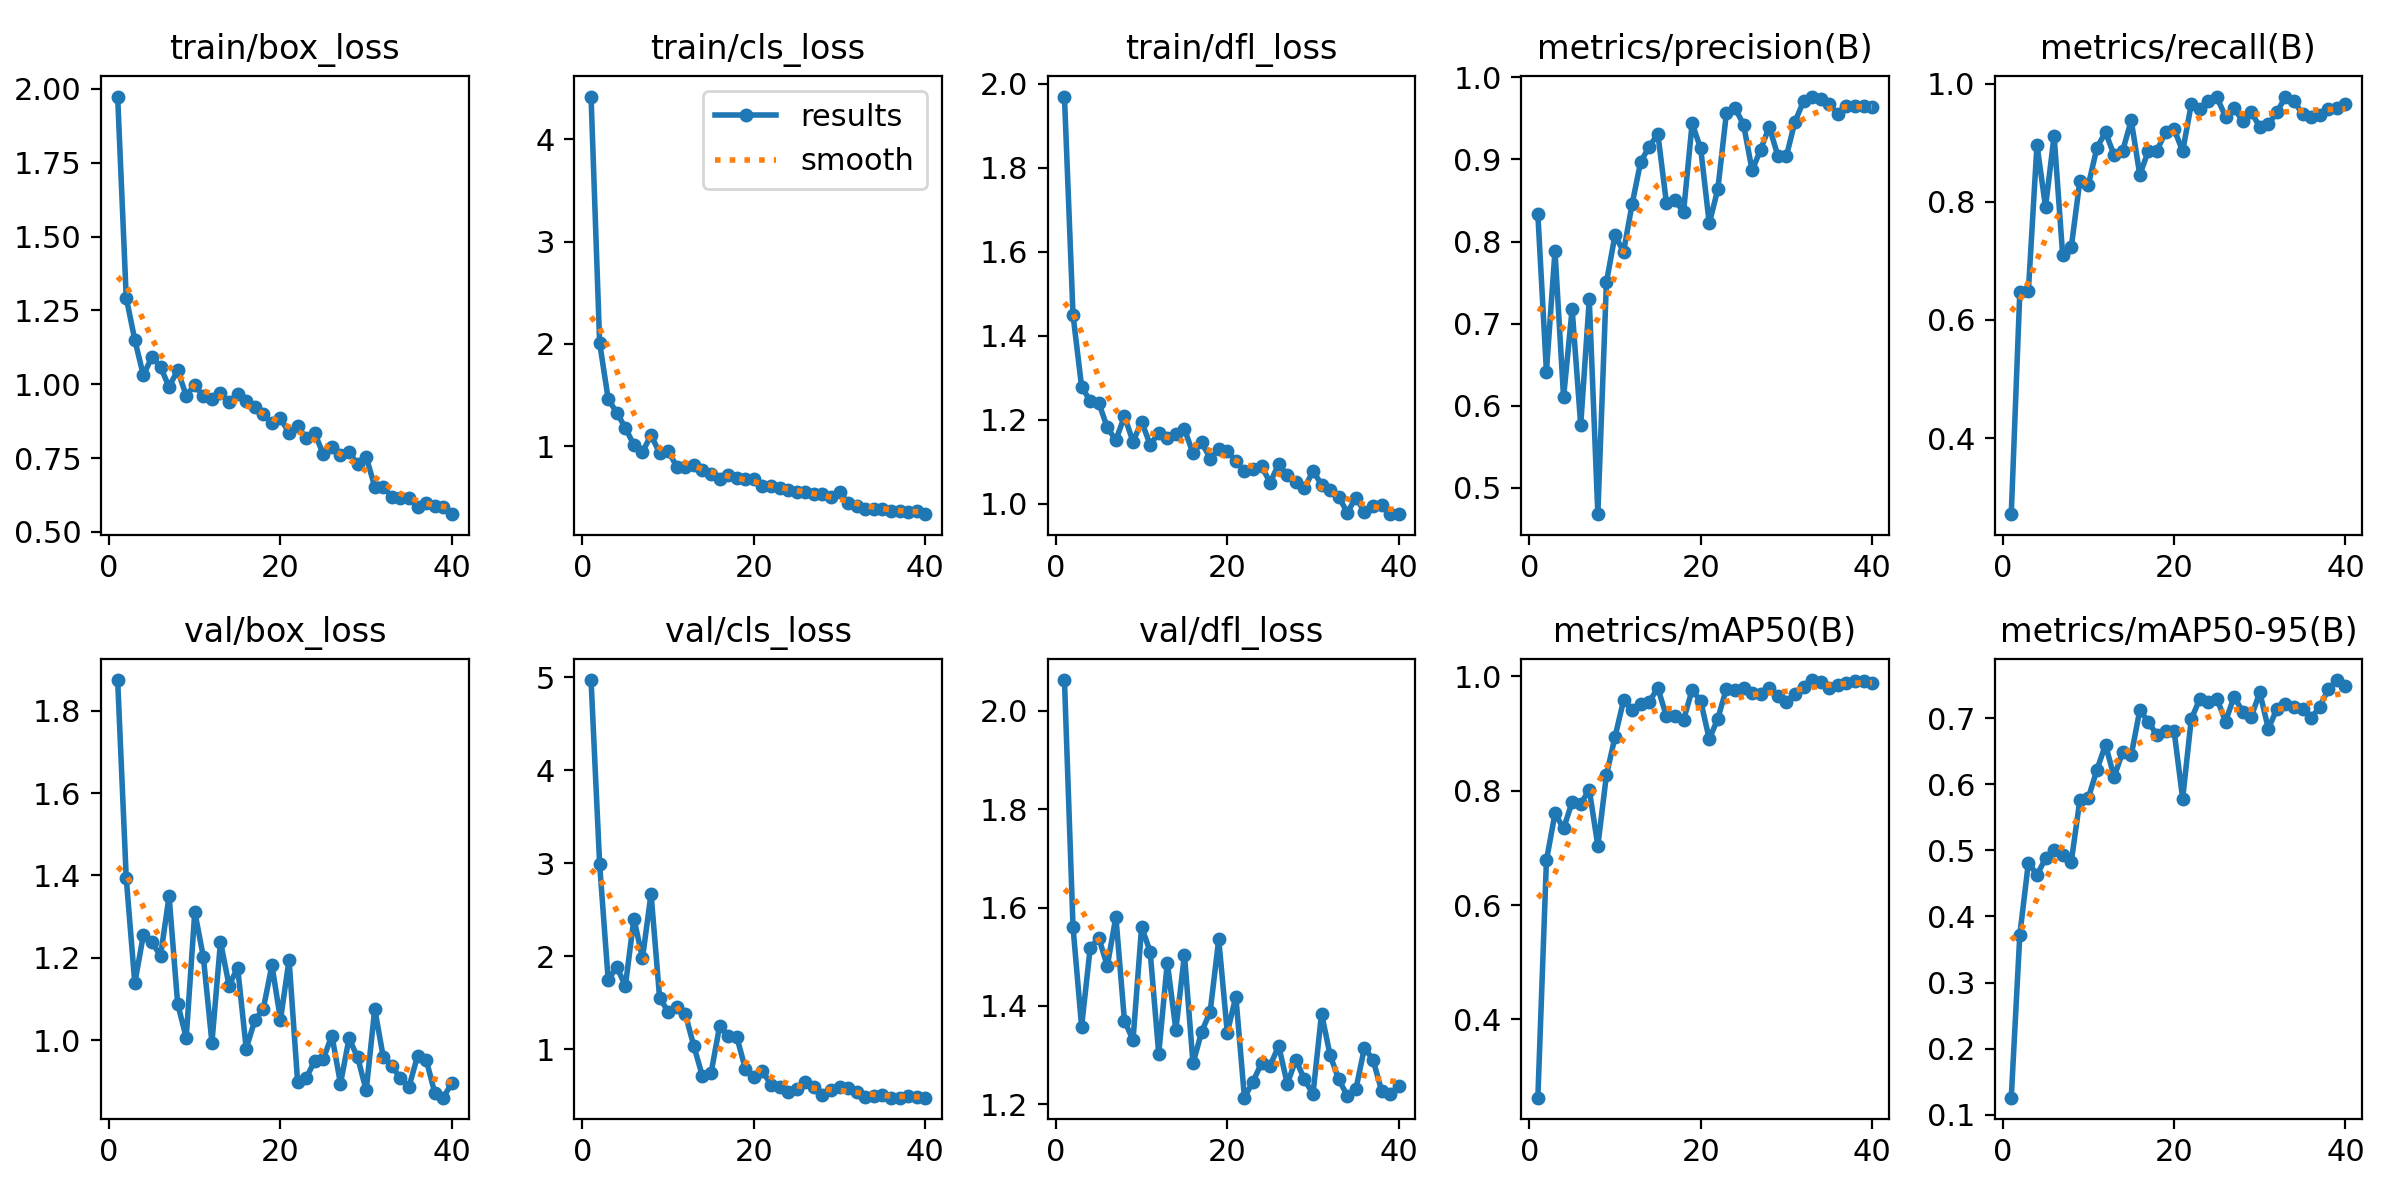

In [50]:
Image(filename=f'/content/runs/detect/train3/results.png', width=600)

In [24]:
model = YOLO('/content/runs/detect/train/weights/last.pt')

In [ ]:
result=model(image)

NameError: name 'image' is not defined

In [51]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.5 source=/content/Drive-Drowsiness-Detection-2/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25846129 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/36 /content/Drive-Drowsiness-Detection-2/test/images/10_jpg.rf.e4696bc5b792a8821fb5a9eb8d6c81d6.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 15.1ms
image 2/36 /content/Drive-Drowsiness-Detection-2/test/images/132_jpg.rf.15715a998a908288272e174739b0408b.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 13.6ms
image 3/36 /content/Drive-Drowsiness-Detection-2/test/images/139_jpg.rf.3cffeb3e581e086f7f1b6658d35b86e7.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 9.5ms
image 4/36 /content/Drive-Drowsiness-Detection-2/test/images/13_jpg.rf.e83ea0fa9f9d90ac13b063c899371095.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 9.3ms
image 5/36 /content/Drive-Drowsiness-Detection-2/test/images/144_jpg.rf.3393fc5c57f38e8704703048449d143f.jpg: 640x640 1 closed_eye, 1 drowsy, 1 yawn, 9.4ms
imag

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get a list of image paths
image_paths = glob.glob('/content/runs/detect/predict3/*.jpg')[-12:]

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))


for i, image_path in enumerate(image_paths):
    # Calculate the row and column indices of the current subplot
    row = i // 4
    col = i % 4

    # Open the image using PIL
    img = Image.open(image_path)


    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()


plt.show()

In [ ]:
name

'yawn'

In [ ]:
classes

[5.0, 8.0, 10.0]

In [ ]:
x1

281.667236328125

In [ ]:
x2

348.3594970703125

In [ ]:
results=model(image)


0: 640x640 1 drowsy, 1 open_eye, 1 yawn, 71.9ms
Speed: 4.5ms preprocess, 71.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [36]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [37]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [38]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [39]:
class_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

In [40]:
model = YOLO('/content/best.pt')

In [43]:
width_ratio=1.50
height_ratio=1.50

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    result=model(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))



    boxes = result[0].boxes.xyxy.tolist()
    classes = result[0].boxes.cls.tolist()
    names = result[0].names
    confidences = result[0].boxes.conf.tolist()


    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)



    for box, cls, conf in zip(boxes, classes, confidences):
      x1, y1, x2, y2 = box
      confidence = conf
      detected_class = cls
      name = names[int(cls)]
      left, top, right, bottom = int(x1 * width_ratio), int(y1 * height_ratio), int(x2 * width_ratio), int(y2 * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[0], 2)

      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(name, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[1], 2)



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>


0: 480x640 (no detections), 19.3ms
Speed: 3.9ms preprocess, 19.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 closed_eye, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 1 closed_eye, 13.4ms
Speed: 4.0ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 closed_eye, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 1 open_eye, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 1 closed_eye, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 closed_eye, 11.0ms
Speed: 1.9ms preprocess, 1

KeyboardInterrupt: 